In [1]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
pb.pltutils.use_style()

## 5.1 Nanoribbons

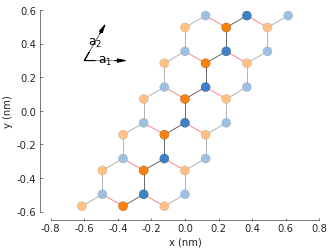

In [2]:

from pybinding.repository import graphene

model_zigzag = pb.Model( 
    graphene.monolayer(), 
    pb.rectangle(1.2),
    pb.translational_symmetry(a1=True,a2=False) )

model_zigzag.plot()
model_zigzag.lattice.plot_vectors(position=[-0.6,0.3]) #왼쪽 위 화살표

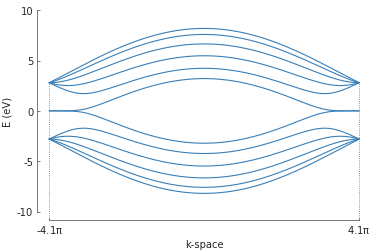

In [3]:
import math as math

solver = pb.solver.lapack(model_zigzag)
a = graphene.a_cc * math.sqrt(3) # ribbon unit cell length

bands = solver.calc_bands(-math.pi/a, math.pi/a)
bands.plot()

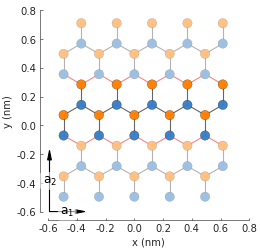

In [4]:
from pybinding.repository import graphene

model_armchair = pb.Model( 
    graphene.monolayer_4atom(), 
    pb.primitive(a1=5),
    pb.translational_symmetry(a1=False,a2=True) )

model_armchair.plot()
model_armchair.lattice.plot_vectors(position=[-0.59,-0.6]) #왼쪽 아래 화살표

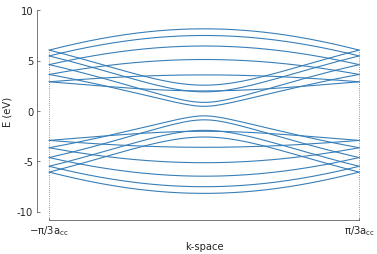

In [5]:
import math as math

solver = pb.solver.lapack(model_armchair)

a = graphene.a_cc * 3 # ribbon unit cell length

bands = solver.calc_bands([0,-math.pi/a], [0,math.pi/a])
bands.plot(point_labels=['$-\pi/3a_{cc}$','$\pi/3a_{cc}$', ])

## 5.2 1D periodic supercell

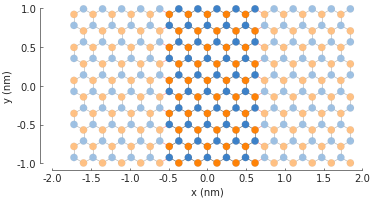

In [16]:
model_supcell = pb.Model( graphene.monolayer_4atom(),
                        pb.rectangle(x=2,y=2),
                        pb.translational_symmetry(a1=1.2, a2=False))
model_supcell.plot()

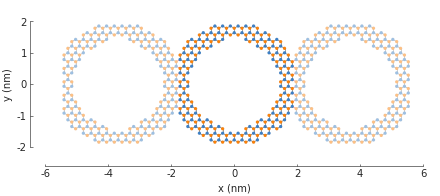

In [37]:
def ring(inner_radius, outer_radius) :
    def contains (x,y,z) :
        r = np.sqrt(x**2 + y**2)
        return np.logical_and(inner_radius < r , r < outer_radius)
    return pb.FreeformShape(contains, width = [2*outer_radius, 2*outer_radius])

model = pb.Model( graphene.monolayer_4atom(),
                ring(inner_radius=1.4, outer_radius=2),
                pb.translational_symmetry(a1=3.8,a2=False))

plt.figure(figsize=[8,3])
model.plot()

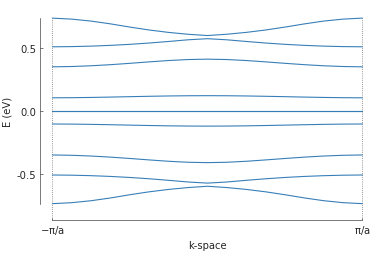

In [8]:
solver = pb.solver.arpack(model,k=10)
a = 3.8 # unit cell length
bands = solver.calc_bands(-math.pi/a, math.pi/a)
bands.plot(point_labels = ['$-\pi/a$','$\pi/a$'])

## 5.3 2D periodic supercell

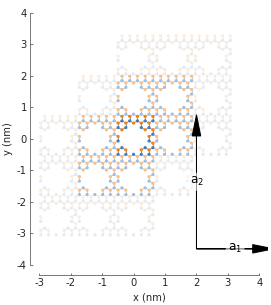

In [36]:
width = 2.5

rectangle = pb.rectangle(x=width*1.2, y=width*1.2)

dot = pb.circle(radius=0.4)

model = pb.Model( graphene.monolayer_4atom(),
                rectangle - dot,
                 #the antidot unit cell is created using a composite shape.
                 #
                pb.translational_symmetry(a1=width/2, a2=width/2) )

plt.figure(figsize=(5,5))
model.plot(num_periods=2)
model.lattice.plot_vectors(position =[2,-3.5], scale = 10 )